In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm

In [2]:
df = pd.read_parquet('combined_data_with_embeddings.parquet')

In [3]:
df

,Text,Label,Model,Original dataset,Row in original dataset,embedding
0,While driverless cars present many promising b...,Machine,darragh_claude_v7,essays,13355,"[0.0044930046, 0.02276886, -0.03793382, 0.0088..."
1,Homework Clubs: The Key to Unlocking Academic ...,Machine,llama2_chat,essays,7249,"[0.0042483085, 0.017574156, -0.010898813, 0.01..."
2,"""The legalization of marijuana has been a cont...",Machine,falcon_180b_v1,essays,2603,"[0.0006997036, -0.008501862, 0.0032627925, -0...."
3,Taking the opportunity to learn new things can...,Machine,mistral7binstruct_v1,essays,3993,"[0.0026538502, 0.0089245895, -0.04195874, -0.0..."
4,Working with a partner is an effective way fo...,Machine,mistral7binstruct_v2,essays,3773,"[0.014354163, 0.01518405, -0.031114087, 0.0014..."
...,...,...,...,...,...,...
79995,The Battle of Lewisham took place on 8 May 180...,Machine,GPT-3 (Curie),wiki,72827,"[-0.007914082, -0.015788127, -0.011993502, 0.0..."
79996,"Asher Wright (September 7, 1803 – April 21, 18...",Machine,GPT-3 (Curie),wiki,106421,"[-0.0071972287, 0.0022026107, -0.030323047, -0..."
79997,LimeWire is a discontinued free software peer-...,Machine,GPT-3 (Curie),wiki,16338,"[-0.012468556, 0.014207671, -0.029412145, 0.00..."
79998,The term Diocese of Canada may refer to: \n\n1...,Machine,GPT-3 (Curie),wiki,53934,"[-0.021509303, -0.028293325, -0.023460228, 0.0..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Text                     80000 non-null  object
 1   Label                    80000 non-null  object
 2   Model                    80000 non-null  object
 3   Original dataset         80000 non-null  object
 4   Row in original dataset  80000 non-null  int64 
 5   embedding                80000 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.7+ MB


In [5]:
df.loc[0:3,'embedding']

0    [0.0044930046, 0.02276886, -0.03793382, 0.0088...
1    [0.0042483085, 0.017574156, -0.010898813, 0.01...
2    [0.0006997036, -0.008501862, 0.0032627925, -0....
3    [0.0026538502, 0.0089245895, -0.04195874, -0.0...
Name: embedding, dtype: object

In [6]:
print(df.loc[0, 'embedding'])

[ 0.004493    0.02276886 -0.03793382 ... -0.008955    0.01749892
 -0.03139916]


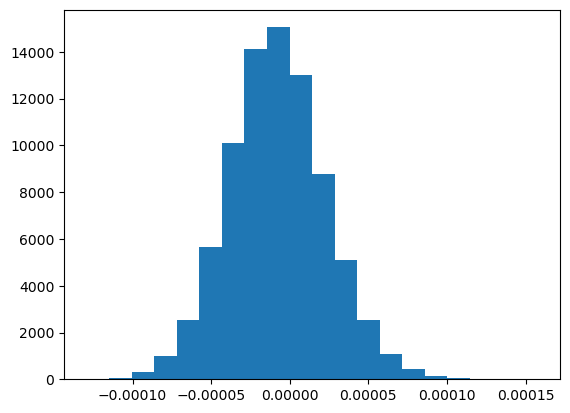

In [7]:
plt.hist(df['embedding'].apply(lambda x: x.mean()), bins = 20)
plt.show()

In [8]:
human = df[df['Label'] == 'Human']
machine = df[df['Label'] == 'Machine']

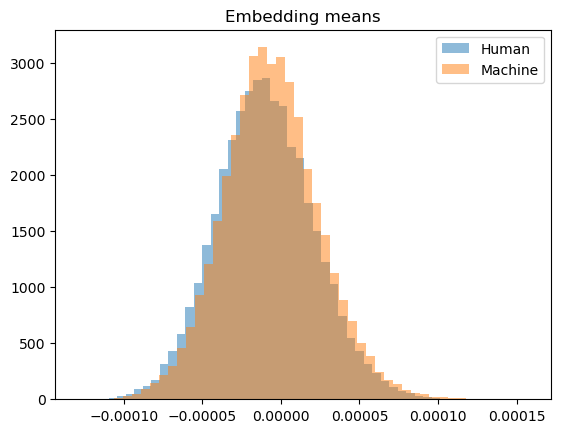

In [9]:
plt.hist(human['embedding'].apply(lambda x: x.mean()), bins = 50, alpha = 0.5, label = 'Human')
plt.hist(machine['embedding'].apply(lambda x: x.mean()), bins = 50, alpha = 0.5, label = 'Machine')
plt.legend()
plt.title("Embedding means")
plt.show()

In [10]:
# Check lengths of vectors, they're all 1
df['length'] = df['embedding'].apply(lambda x: (x**2).sum())
df['length'].value_counts()

length
1.0    43252
1.0    12976
1.0    10990
1.0    10975
1.0      912
1.0      801
1.0       94
Name: count, dtype: int64

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components = 2)

In [13]:
pca_2dim = pca.fit_transform(np.array(list(df['embedding'])))

In [14]:
df['pca_x'] = pca_2dim[:,0]
df['pca_y'] = pca_2dim[:,1]

In [15]:
human = df[df['Label'] == 'Human']
machine = df[df['Label'] == 'Machine']

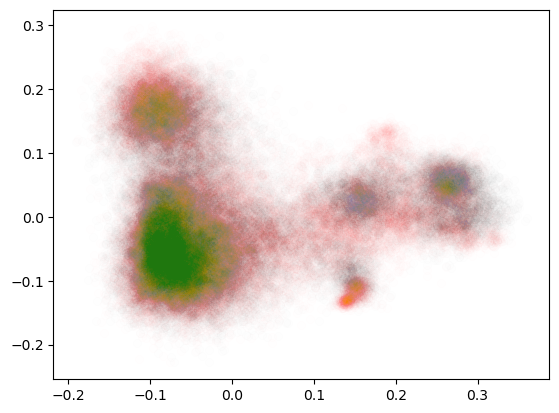

In [16]:
a = 0.005
plt.scatter(human['pca_x'], human['pca_y'], alpha = a)
plt.scatter(machine['pca_x'], machine['pca_y'], alpha = a)
plt.show()

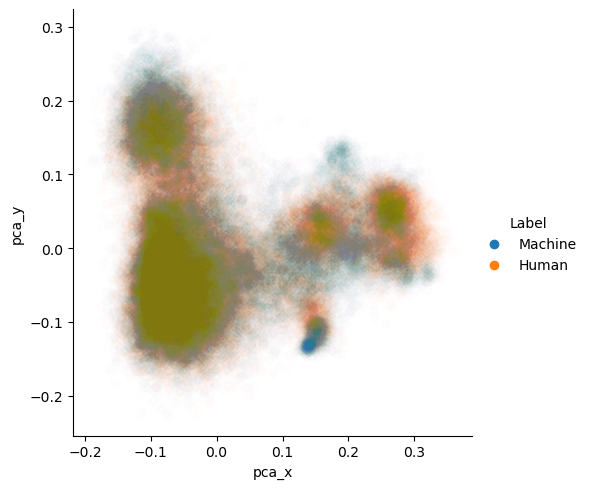

In [18]:
g = sns.lmplot(data = df, x = 'pca_x', y = 'pca_y', hue = 'Label', scatter_kws = {'alpha':0.008},fit_reg = False)
for lh in g._legend.legend_handles: 
    lh.set_alpha(1)
plt.show()

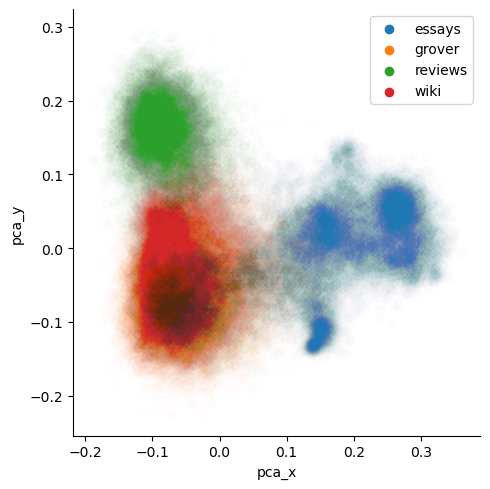

In [19]:
sns.lmplot(data = df, x = 'pca_x', y = 'pca_y', hue = 'Original dataset', scatter_kws = {'alpha':0.008},fit_reg = False, legend = False)
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.show()

In [28]:
tsne = TSNE(n_components=2)

In [29]:
tsne_2d = tsne.fit_transform(np.array(list(df['embedding'])))

In [30]:
df['tsne_x'] = tsne_2d[:,0]
df['tsne_y'] = tsne_2d[:,1]

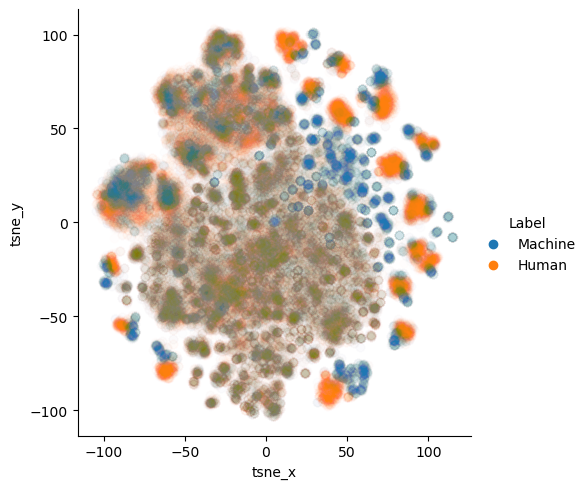

In [31]:
g = sns.lmplot(data = df, x = 'tsne_x', y = 'tsne_y', hue = 'Label', scatter_kws = {'alpha':0.008},fit_reg = False)
for lh in g._legend.legend_handles: 
    lh.set_alpha(1)
plt.show()

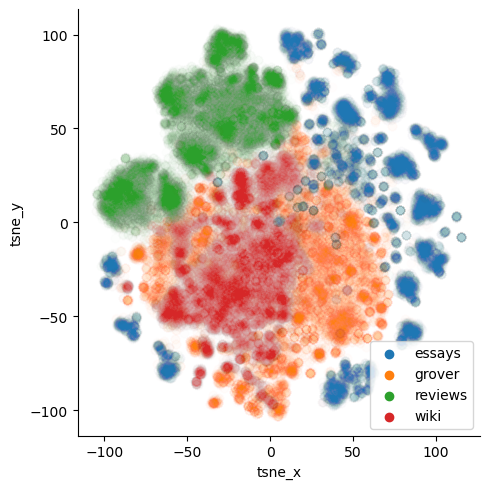

In [32]:
sns.lmplot(data = df, x = 'tsne_x', y = 'tsne_y', hue = 'Original dataset', scatter_kws = {'alpha':0.008},fit_reg = False, legend = False)
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.show()

In [34]:
umap_2d = umap.UMAP().fit_transform(np.array(list(df['embedding'])))

In [35]:
df['umap_x'] = umap_2d[:,0]
df['umap_y'] = umap_2d[:,1]

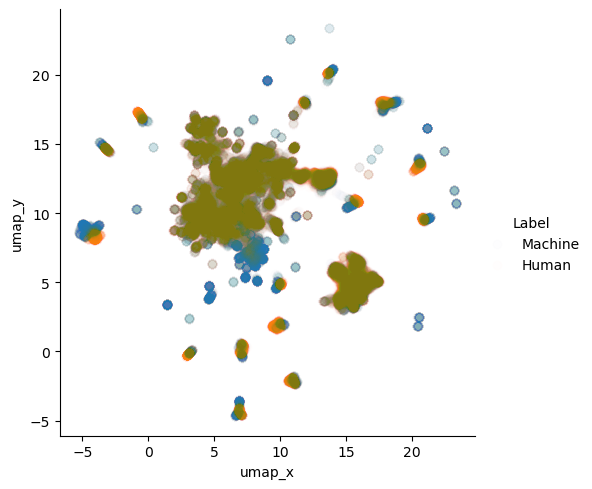

In [36]:
sns.lmplot(data = df, x = 'umap_x', y = 'umap_y', hue = 'Label', scatter_kws = {'alpha':0.008},fit_reg = False)
plt.show()

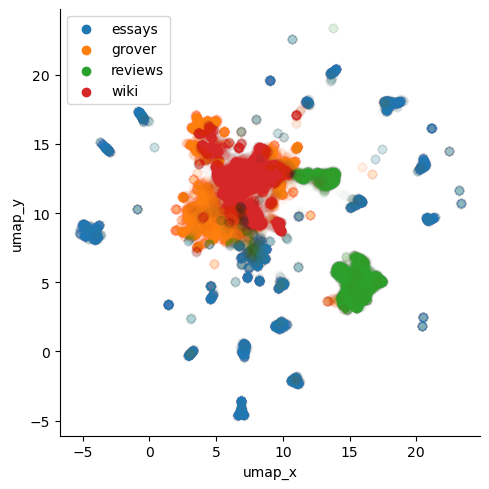

In [37]:
sns.lmplot(data = df, x = 'umap_x', y = 'umap_y', hue = 'Original dataset', scatter_kws = {'alpha':0.008},fit_reg = False, legend = False)
leg = plt.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.show()

### Essays EDA

In [58]:
essays = df[df['Original dataset'] == 'essays']

In [59]:
essays_full = pd.read_csv("essays_balanced.csv")

In [60]:
essays = essays.set_index('Row in original dataset')

In [62]:
essays['Prompt'] = essays_full.loc[essays.index]['prompt_name']

In [64]:
essays.head()

,Text,Label,Model,Original dataset,embedding,length,pca_x,pca_y,tsne_x,tsne_y,umap_x,umap_y,Prompt
Row in original dataset,,,,,,,,,,,,,
13355,While driverless cars present many promising b...,Machine,darragh_claude_v7,essays,"[0.0044930046, 0.02276886, -0.03793382, 0.0088...",1.0,0.108300,0.017525,20.414623,67.272522,9.636006,4.560882,Driverless cars
7249,Homework Clubs: The Key to Unlocking Academic ...,Machine,llama2_chat,essays,"[0.0042483085, 0.017574156, -0.010898813, 0.01...",1.0,0.229019,0.064710,104.966240,-4.840454,23.320633,10.694386,Mandatory extracurricular activities
2603,"""The legalization of marijuana has been a cont...",Machine,falcon_180b_v1,essays,"[0.0006997036, -0.008501862, 0.0032627925, -0....",1.0,0.136518,-0.051420,61.998966,-0.025407,4.453948,7.797115,Car-free cities
3993,Taking the opportunity to learn new things can...,Machine,mistral7binstruct_v1,essays,"[0.0026538502, 0.0089245895, -0.04195874, -0.0...",1.0,0.192556,0.039003,42.994801,28.561401,8.120687,6.981452,Summer projects
3773,Working with a partner is an effective way fo...,Machine,mistral7binstruct_v2,essays,"[0.014354163, 0.01518405, -0.031114087, 0.0014...",1.0,0.188979,0.053718,63.357479,43.360191,8.197071,5.304895,Summer projects


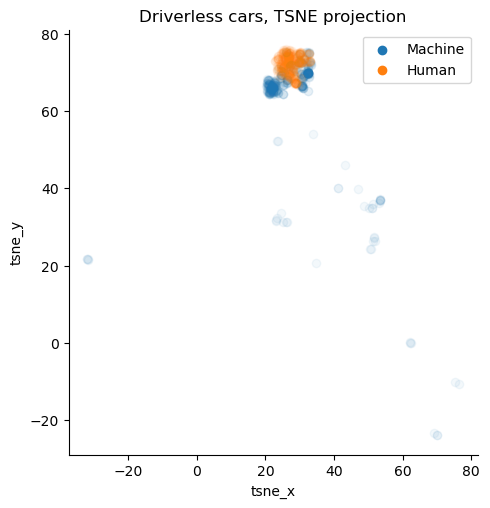

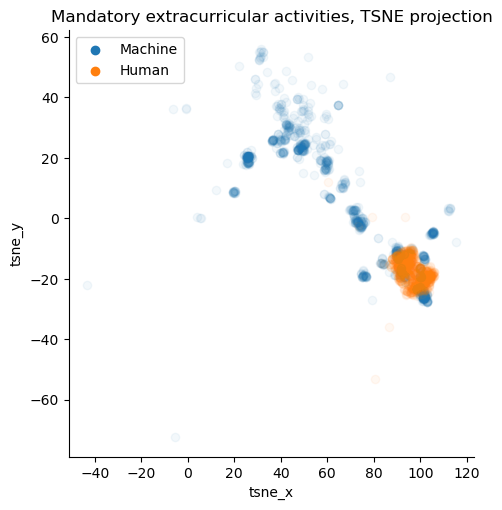

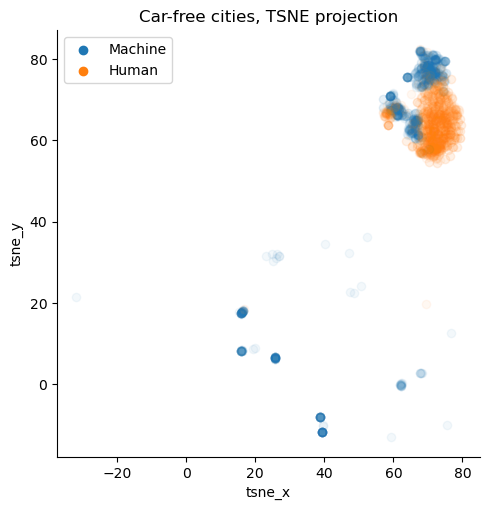

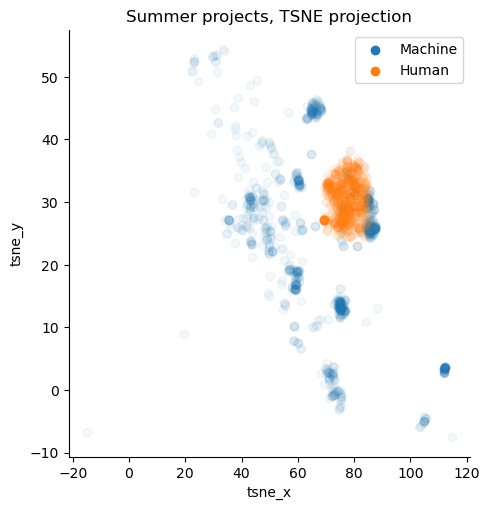

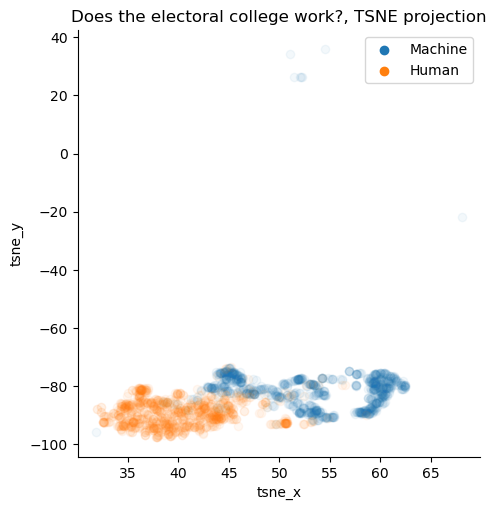

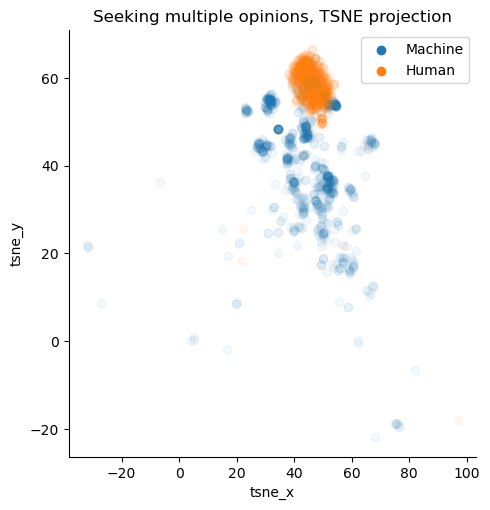

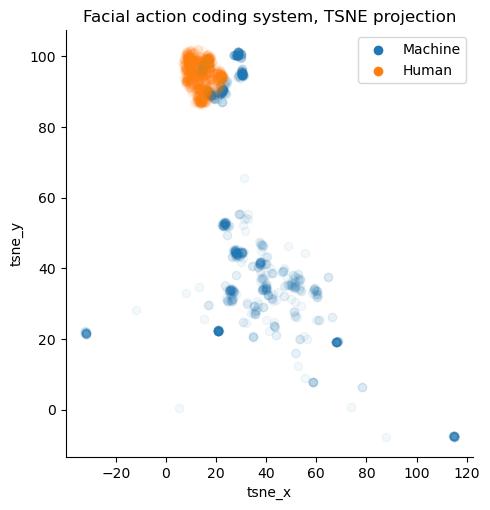

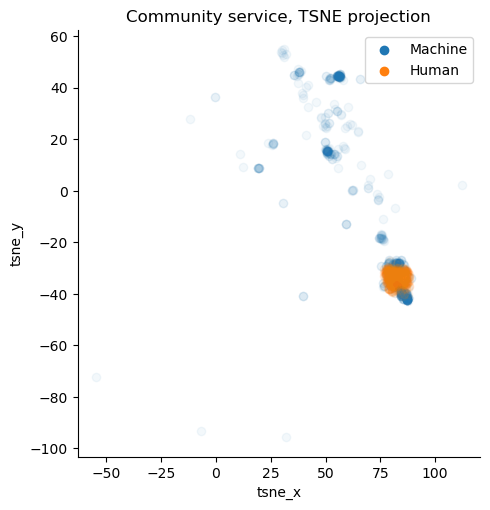

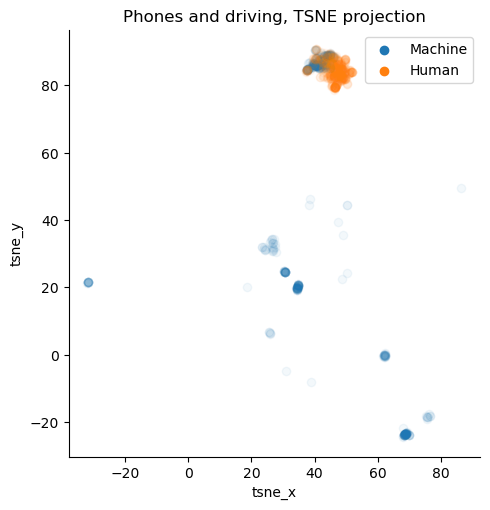

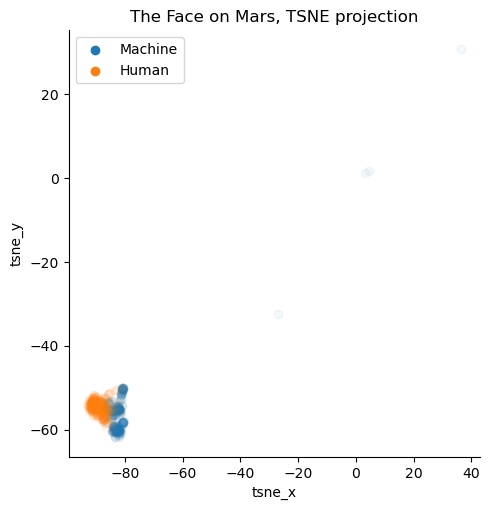

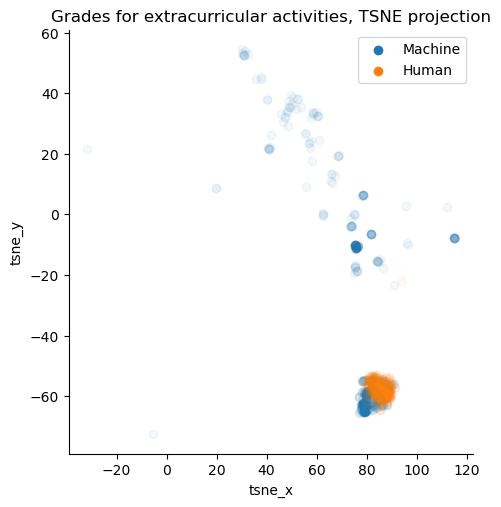

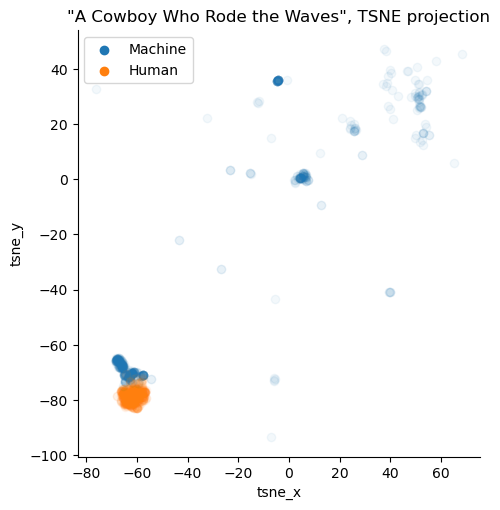

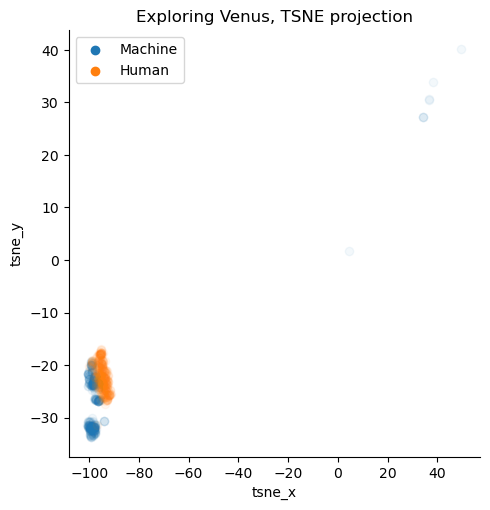

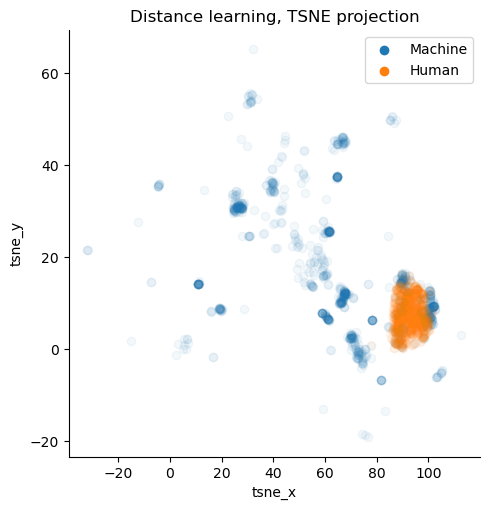

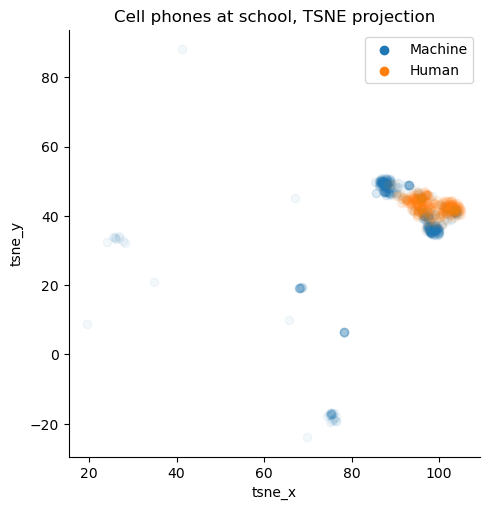

In [76]:
prompts = essays['Prompt'].unique()
for prompt in prompts:
    g = sns.lmplot(data = essays[essays['Prompt'] == prompt], x = 'tsne_x', y = 'tsne_y', hue = 'Label', scatter_kws = {'alpha':0.05},fit_reg = False, legend = False)
    leg = plt.legend()
    for lh in leg.legend_handles: 
        lh.set_alpha(1)
    g.ax.set_title(f"{prompt}, TSNE projection")
    plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'save_figure'

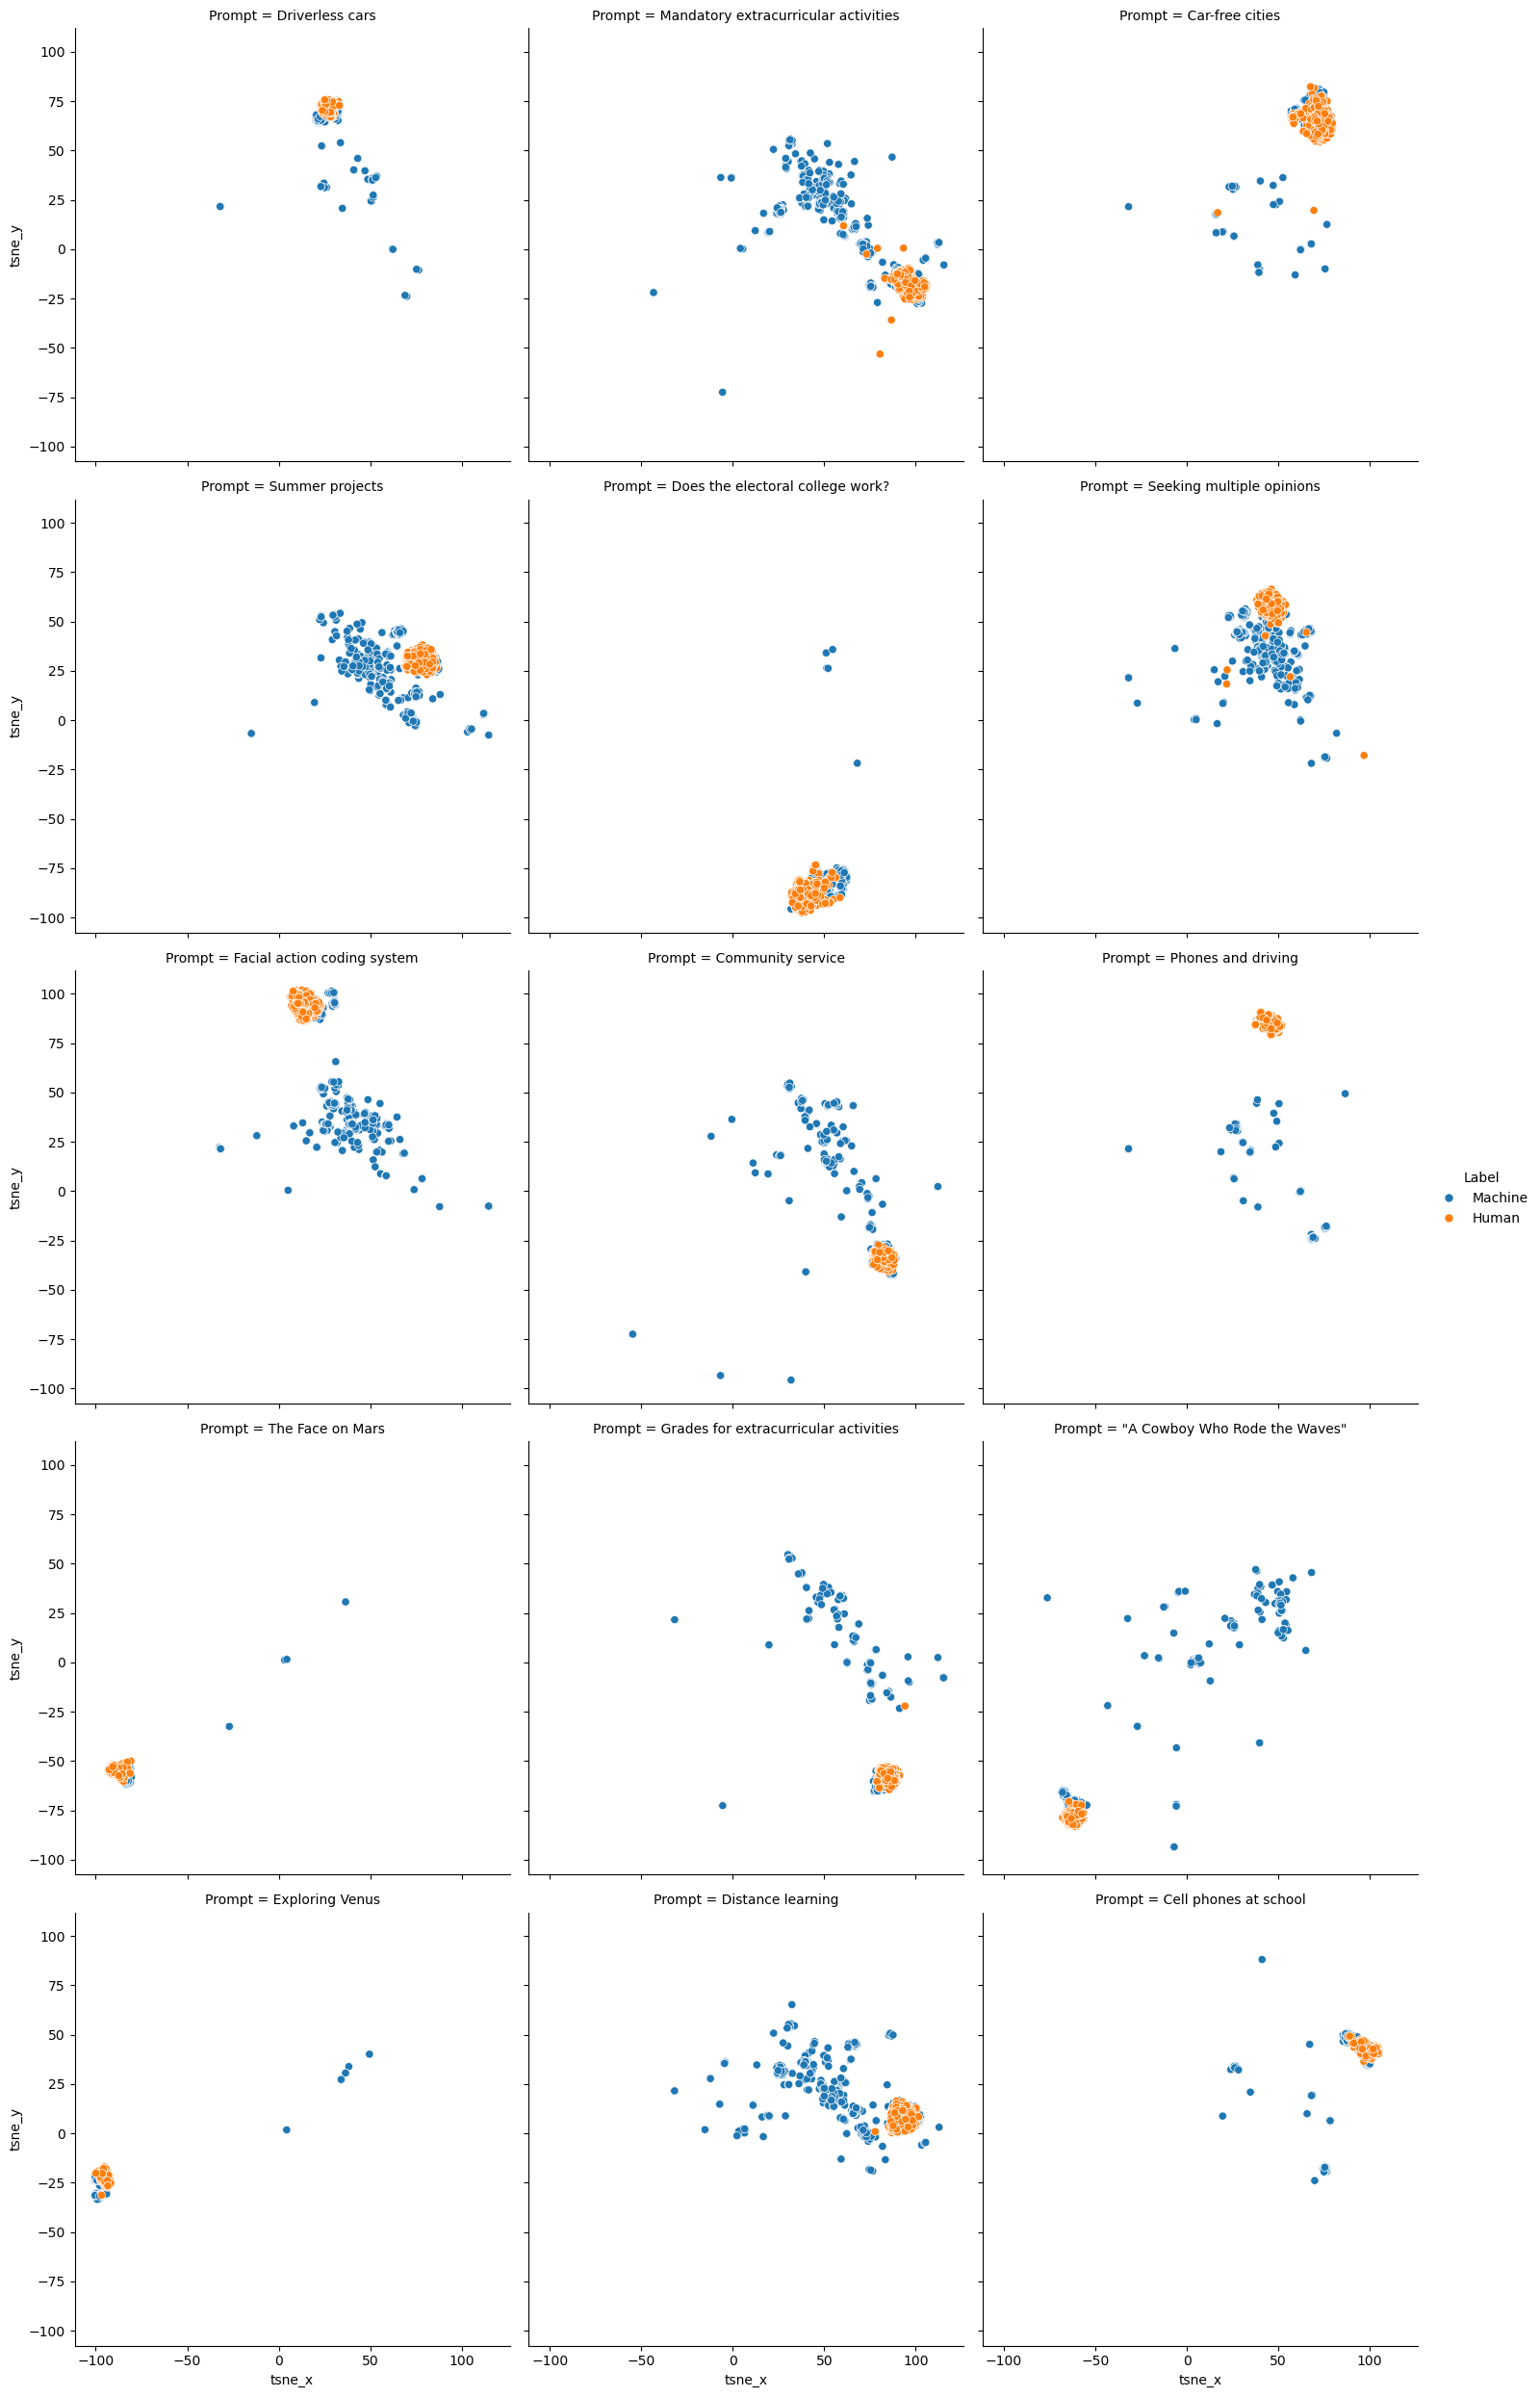

In [86]:
sns.relplot(data=essays,
              x='tsne_x',
              y='tsne_y',
              kind='scatter',
            hue = 'Label',
              col='Prompt',
              col_wrap=3)
plt.save_figure('embeddings.png')
plt.show()